<a href="https://colab.research.google.com/github/widyamelia26/Facial-Emotion-Recognition/blob/main/Emosi_ResNet50v2_(48%2C81_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash

# Check if the dataset already exists
if test -e "emotion-detection-fer.zip"; then
    rm -rf emotion-detection-fer.zip ./train ./test
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
else
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
fi

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0

Archive:  emotion-detection-fer.zip
  inflating: test/angry/im0.png      
  inflating: test/angry/im1.png      
  inflating: test/angry/im10.png     
  inflating: test/angry/im100.png    
  inflating: test/angry/im101.png    
  inflating: test/angry/im102.png    
  inflating: test/angry/im103.png    
  inflating: test/angry/im104.png    
  inflating: test/angry/im105.png    
  inflating: test/angry/im106.png    
  inflating: test/angry/im107.png    
  inflating: test/angry/im108.png    
  inflating: test/angry/im109.png    
  inflating: test/angry/im11.png     
  inflating: test/angry/im110.png    
  inflating: test/angry/im111.png    
  inflating: test/angry/im112.png    
  inflating: test/angry/im113.png    
  inflating: test/angry/im114.png    
  inflating: test/angry/im115.png    
  inflating: test/angry/im116.png    
  inflating: test/angry/im117.png    
  inflating: test/angry/im118

100%|██████████| 65.2M/65.2M [00:01<00:00, 67.0MB/s]


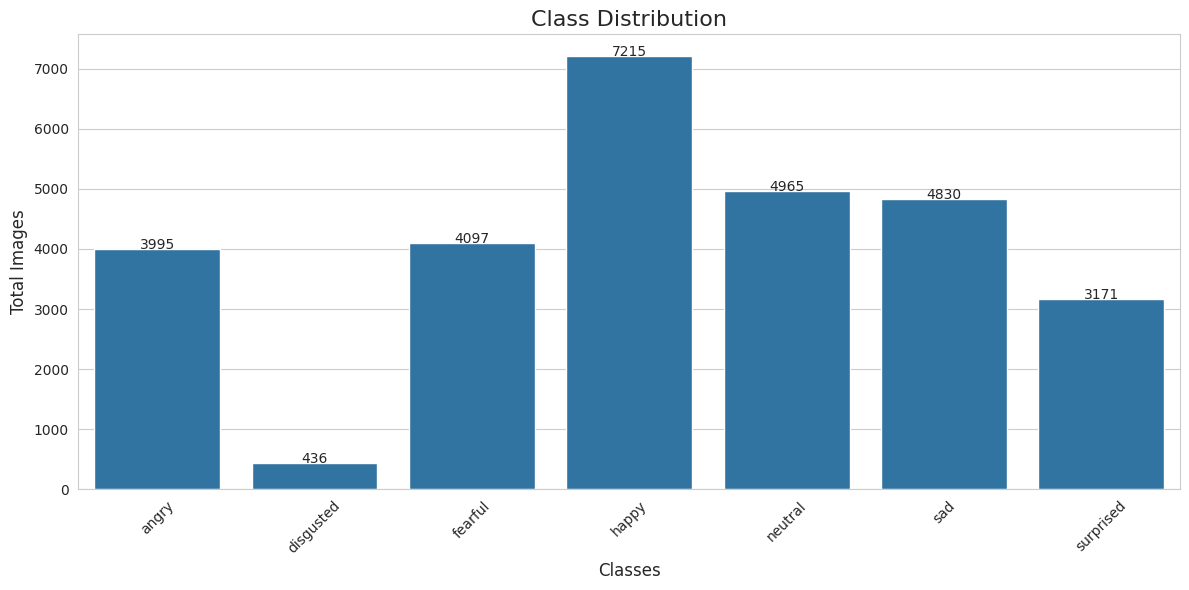

In [ ]:
import glob

import matplotlib.pyplot as plt
import seaborn as sns


train_path = "/content/train"
test_path = "/content/test"
class_names = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]
class_distribution = {}

# Put image paths to dictionary using class names as keys.
for class_name in class_names:
    class_distribution[class_name] = len(glob.glob(f"{train_path}/{class_name}/*"))

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))

plt.title("Class Distribution", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Total Images", fontsize=12)
plt.xticks(rotation=45)

# Add value labels of each bar.
for index, value in enumerate(class_distribution.values()):
    plt.text(index, value, str(value), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

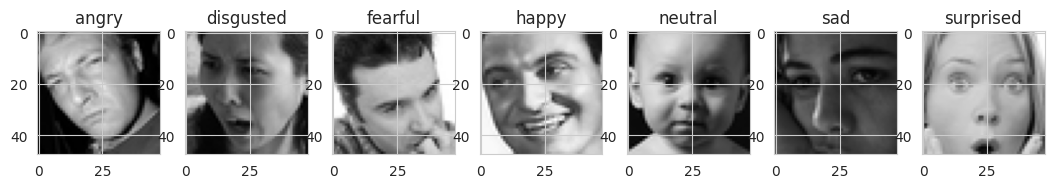

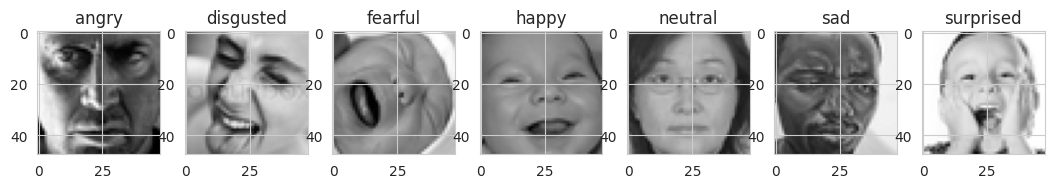

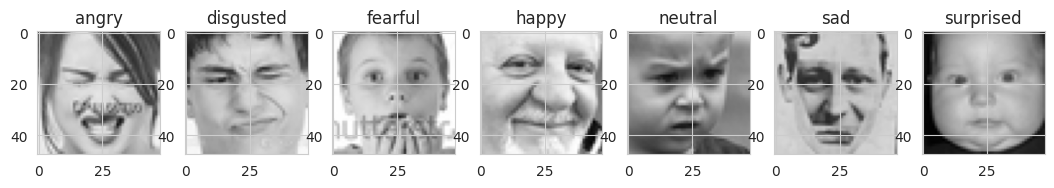

In [ ]:
import cv2
import numpy as np


def plot_sample_images():
    fig, axis = plt.subplots(1, 7, figsize=[13, 15])

    for index, (class_name, count) in enumerate(class_distribution.items()):
        # Randomly choose images to plot.
        random_index = np.random.randint(0, count)
        img_read = cv2.imread(
            glob.glob(f"{train_path}/{class_name}/*")[random_index]
        )

        axis[index].imshow(img_read)
        axis[index].set_title(class_name)

# Plot several samples of each class.
for i in range(0, 3):
    plot_sample_images()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data generator for traning and validation.
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.7,1.3],
    validation_split=0.2 # 20% of images to be used for validation.
)

train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    subset="training",
)

validation_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
# Data generator for evaluation.
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    shuffle = False  # Keep this False for confusion matrix.
)

Found 7178 images belonging to 7 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24            │ (None, 48, 48, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer_24[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 12, 12, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 12, 12, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 14, 14, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 26,197,511 (99.94 MB)

 Trainable params: 17,073,159 (65.13 MB)

 Non-trainable params: 9,124,352 (34.81 MB)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.509945 to fit



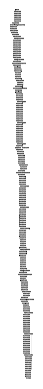

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2


def create_model(num_classes=7):
    # Input layer
    inputs = tf.keras.Input(shape=(48, 48, 3))

    # Load ResNet50V2 without top layers
    resnet = ResNet50V2(
        weights='imagenet',
        include_top=False,
        input_tensor=inputs
    )

    # Freeze early layers of ResNet
    for layer in resnet.layers[:-30]:
        layer.trainable = False


    # Connect to ResNet
    x = resnet.output

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    # First dense block
    x = Dense(1024, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.5)(x)

    # Second dense block
    x = Dense(512, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Buat model
model = create_model()
model.summary()
# Gambar flowchart dari model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Menampilkan flowchart dalam notebook
img = plt.imread('cnn_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=categorical_crossentropy,
    metrics=["accuracy"]
)

# Define callbacks.
early_stopping = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True,verbose=1)
checkpoint = ModelCheckpoint("emotion_detection_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model.
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
    )

# Determine at which epoch early stopping occurred
stopped_epoch = len(history.history['accuracy'])
print(f"Training stopped at epoch: {stopped_epoch}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2678 - loss: 9.5409
Epoch 1: val_accuracy improved from -inf to 0.33897, saving model to emotion_detection_model.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 99s 107ms/step - accuracy: 0.2679 - loss: 9.5348 - val_accuracy: 0.3390 - val_loss: 3.8015 - learning_rate: 0.0010
Epoch 2/50
716/718 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3426 - loss: 2.2828
Epoch 2: val_accuracy improved from 0.33897 to 0.35168, saving model to emotion_detection_model.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 58s 80ms/step - accuracy: 0.3426 - loss: 2.2826 - val_accuracy: 0.3517 - val_loss: 3.5261 - learning_rate: 0.0010
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3591 - loss: 2.2390
Epoch 3: val_accuracy did not improve from 0.35168
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 76ms/step - accuracy: 0.3591 - loss: 2.2389 - val_accuracy: 0.3409 - val_loss: 3.9396 - learning_rate: 0.0010
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3

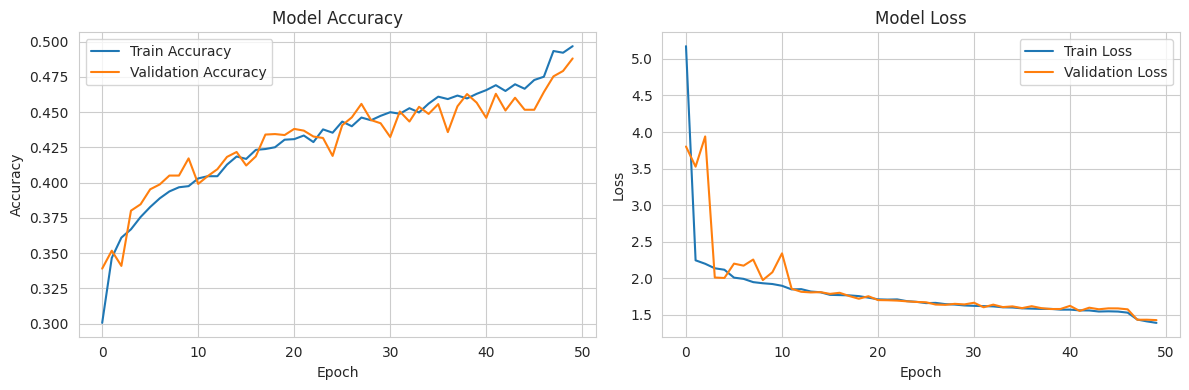

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Nama-nama kelas emosi
class_names = ["angry", "fearful", "happy", "neutral", "sad", "surprised"]

# Peroleh true labels dari test generator
true_labels = test_generator.classes

# Reset test generator sebelum prediksi
test_generator.reset()

# Dapatkan prediksi model pada data test
predicted = model.predict(test_generator)
predicted_labels = np.argmax(predicted, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step


## Using Transfer Learning

### VGGNet

### ResNet

### ImageNet